<a href="https://colab.research.google.com/github/anilkumargangadhara09/GenAI-ML/blob/main/Course_end_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/rolling_stones_spotify.csv')

# Task
Analyze the provided problem description and create a plan to perform exploratory data analysis and cluster analysis on a dataset of songs to create song cohorts based on various features.

## Explore data

### Subtask:
Display basic information about the data, such as the column names, data types, and the number of missing values.


**Reasoning**:
Display the column names, data types, and the number of missing values in the DataFrame.



In [ ]:
import pandas as pd
data = pd.read_csv('/content/rolling_stones_spotify.csv')
data.info()
print("\nMissing values per column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


## Analyze song features

### Subtask:
Explore the distributions of various audio features like 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', and 'tempo'.


**Reasoning**:
To explore the distributions of the specified audio features, I will first select the relevant columns from the `data` dataframe. Then, I will use the `.describe()` method to get summary statistics and the `.hist()` method to create histograms for each of these features. Finally, I will display both the summary statistics and the histograms.



       danceability       energy     loudness  acousticness  instrumentalness  \
count   1610.000000  1610.000000  1610.000000   1610.000000       1610.000000   
mean       0.468860     0.792352    -6.971615      0.250475          0.164170   
std        0.141775     0.179886     2.994003      0.227397          0.276249   
min        0.104000     0.141000   -24.408000      0.000009          0.000000   
25%        0.362250     0.674000    -8.982500      0.058350          0.000219   
50%        0.458000     0.848500    -6.523000      0.183000          0.013750   
75%        0.578000     0.945000    -4.608750      0.403750          0.179000   
max        0.887000     0.999000    -1.014000      0.994000          0.996000   

         liveness      valence        tempo  
count  1610.00000  1610.000000  1610.000000  
mean      0.49173     0.582165   126.082033  
std       0.34910     0.231253    29.233483  
min       0.02190     0.000000    46.525000  
25%       0.15300     0.404250   107.390

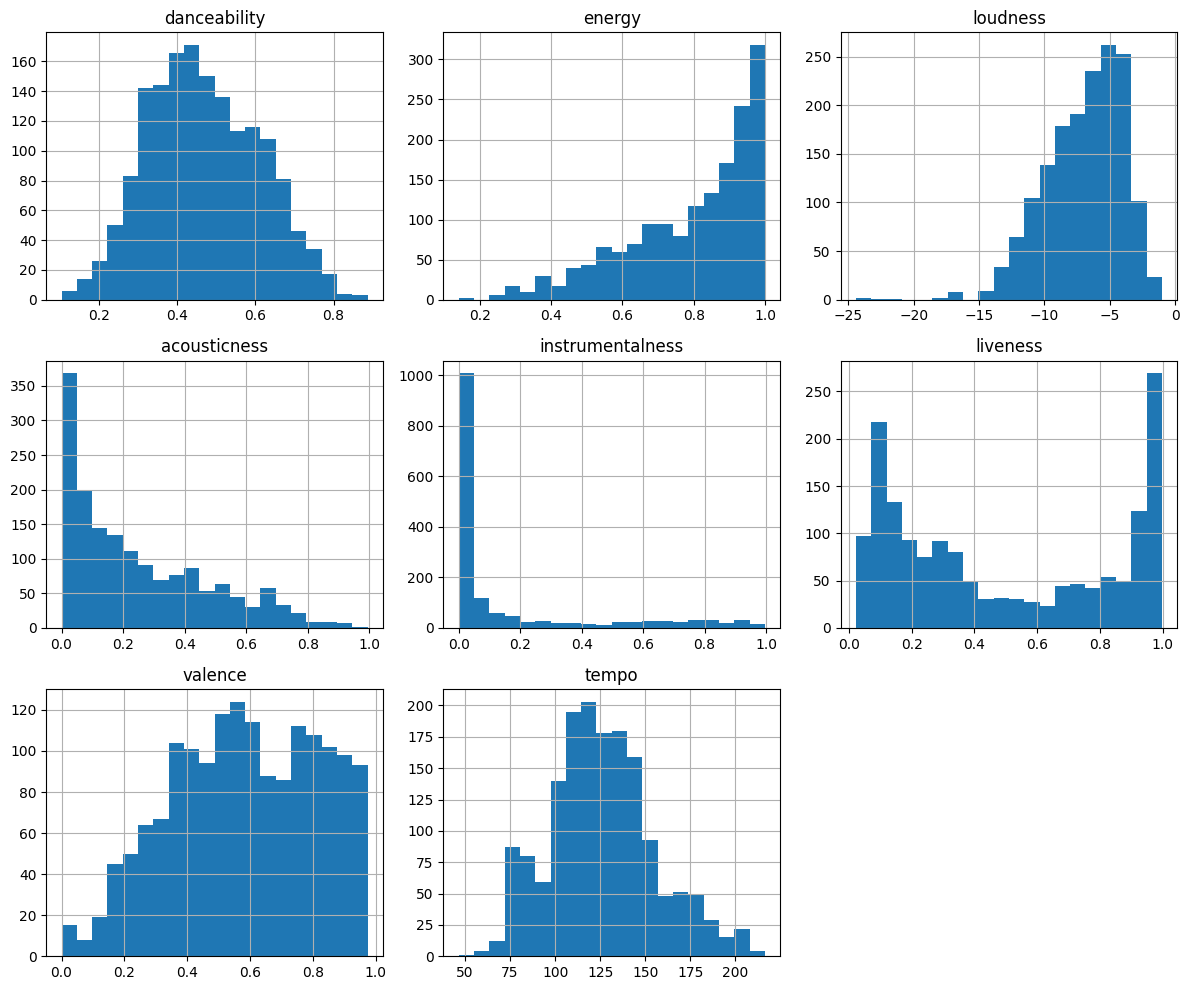

In [ ]:
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(data[features].describe())
data[features].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

## Visualize relationships

### Subtask:
Create visualizations (e.g., scatter plots, pair plots) to understand the relationships between different song features.


**Reasoning**:
Import the seaborn library and create a pair plot to visualize the relationships between the selected audio features.



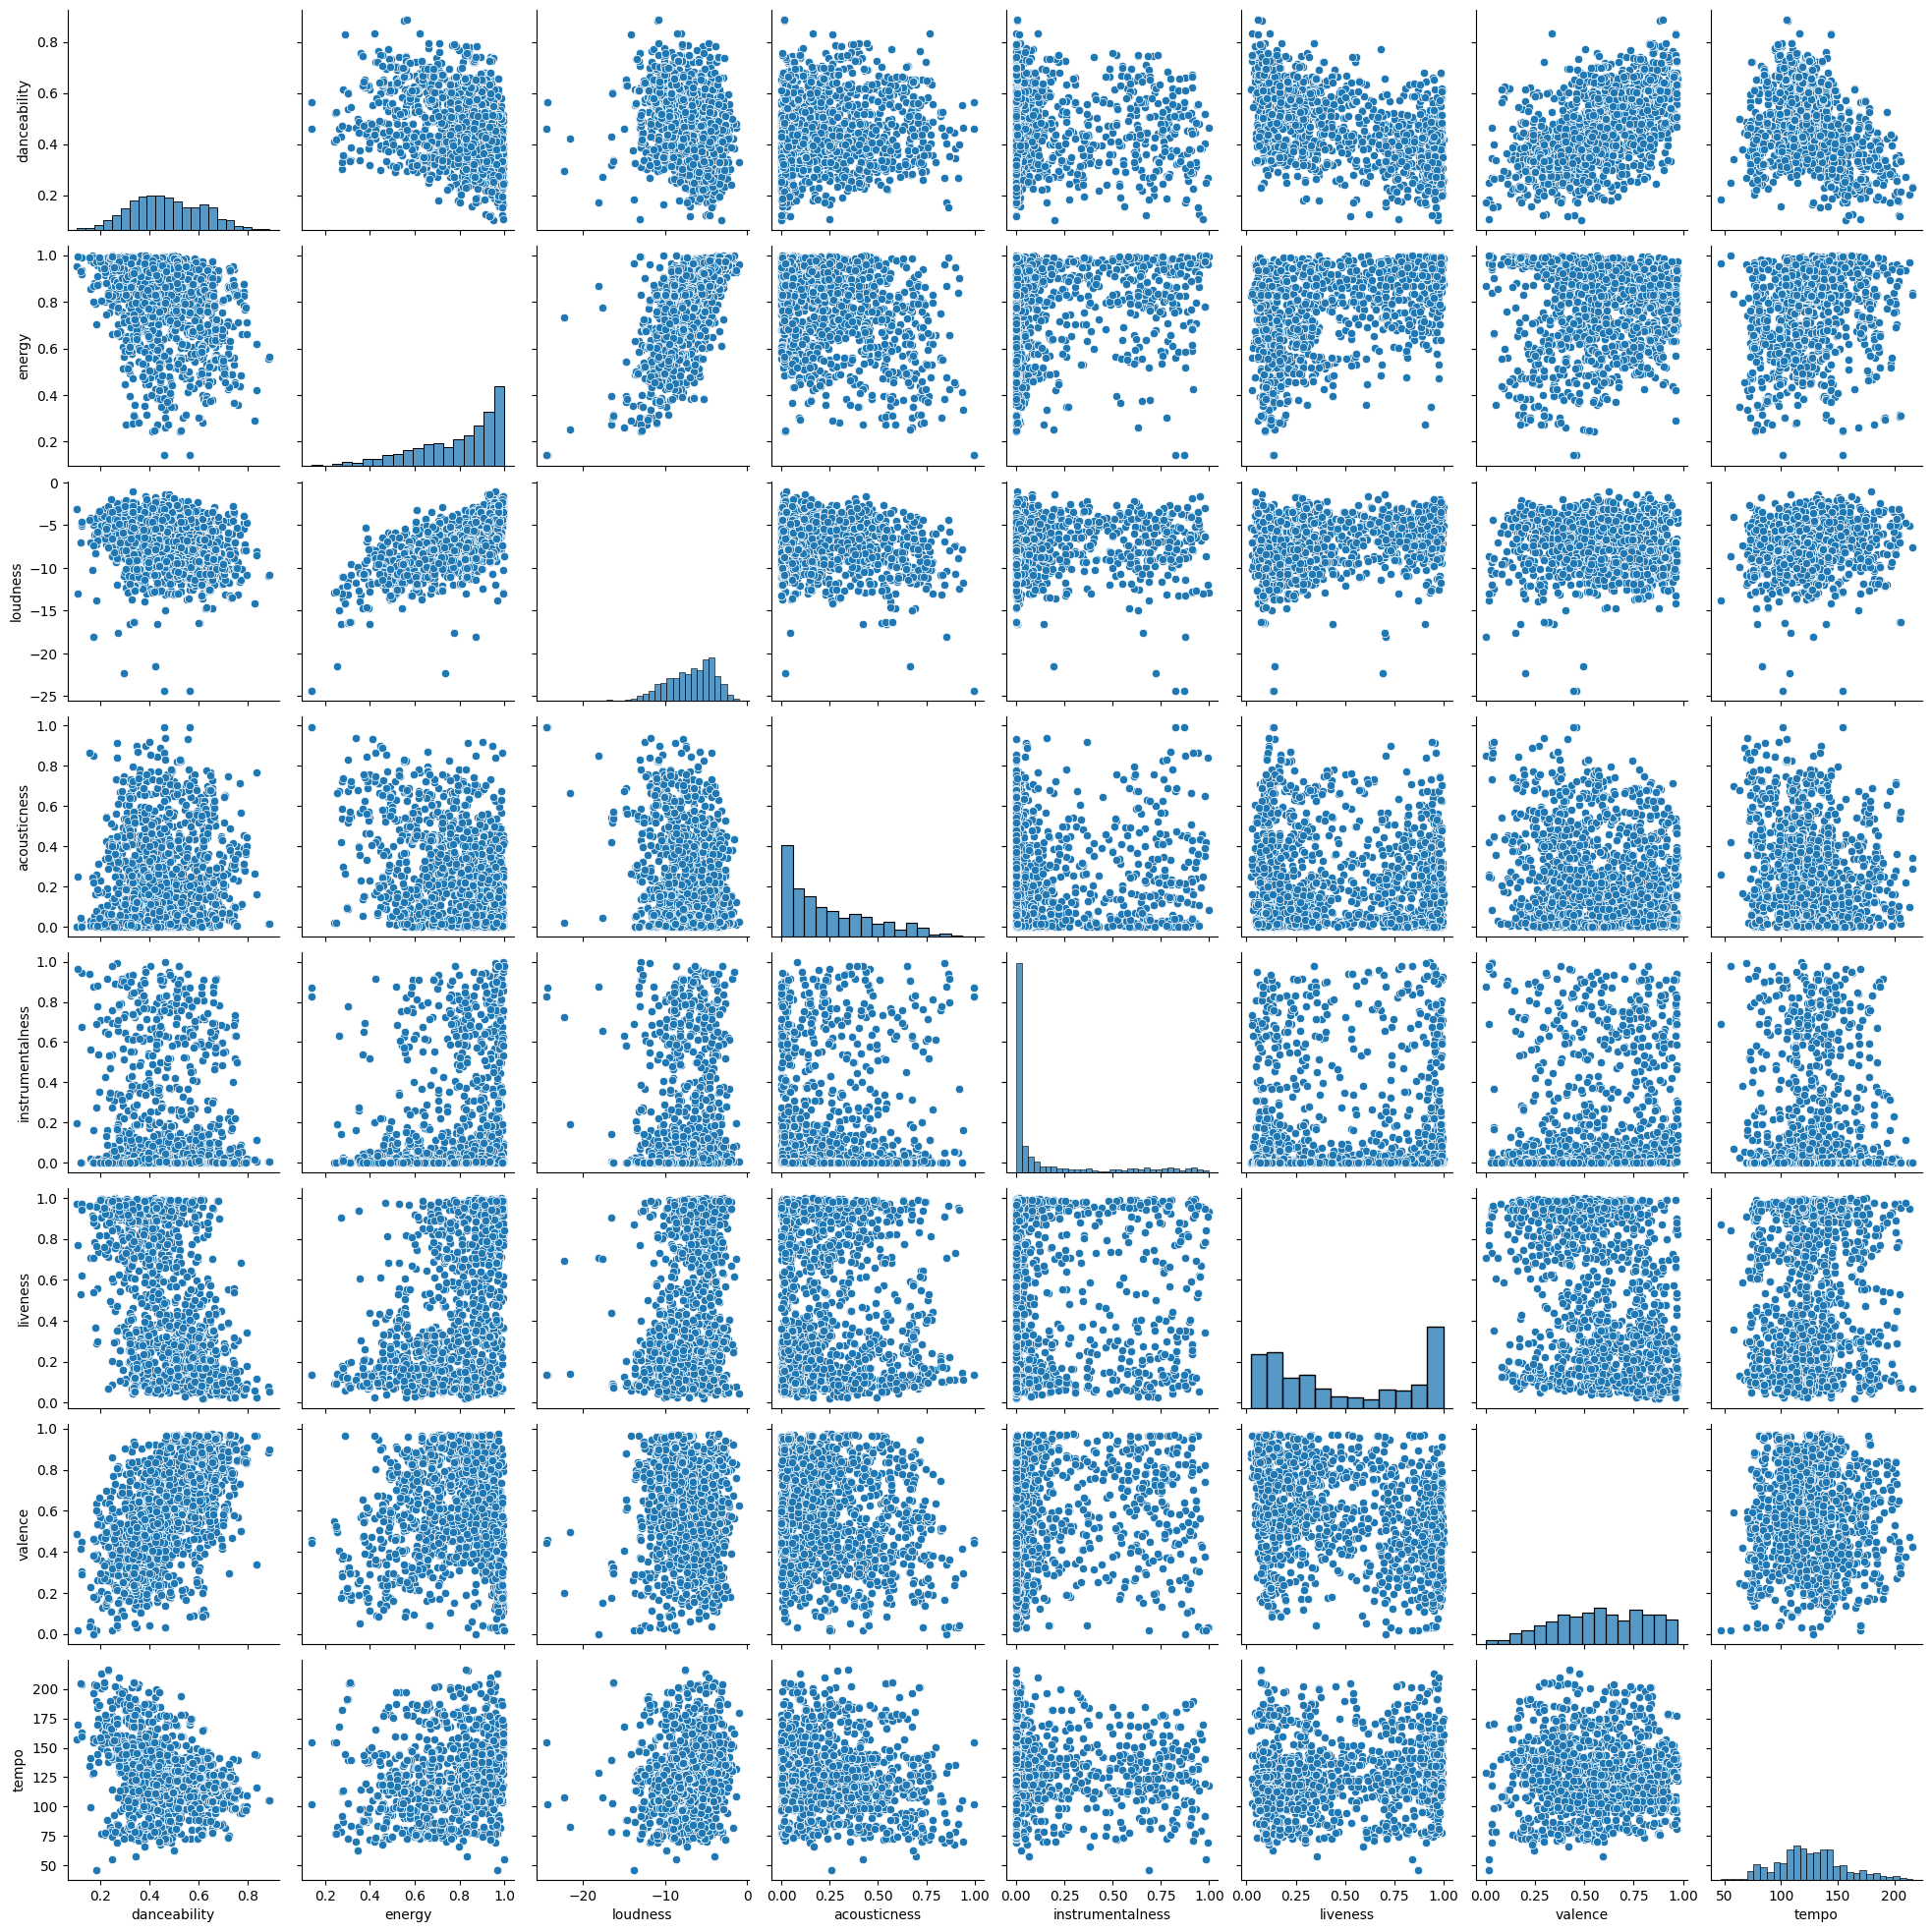

In [ ]:
import seaborn as sns

features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
sns.pairplot(data[features])

**Reasoning**:
The pair plot has been created. The next step is to display the plot using `plt.show()`.



In [ ]:
import matplotlib.pyplot as plt

plt.show()

## Preprocess data

### Subtask:
Scale or normalize the relevant numerical features to prepare them for clustering.


**Reasoning**:
Scale the selected numerical features using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_for_clustering])

## Determine optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the optimal number of clusters for the K-Means algorithm.


**Reasoning**:
Import necessary libraries for KMeans and silhouette score calculation, initialize lists for inertia and silhouette scores, and iterate through a range of cluster numbers to train KMeans models, calculate inertia and silhouette scores, and store them.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_scores.append(score)


**Reasoning**:
Plot the inertia values and silhouette scores against the number of clusters to visualize the results of the elbow method and silhouette analysis.



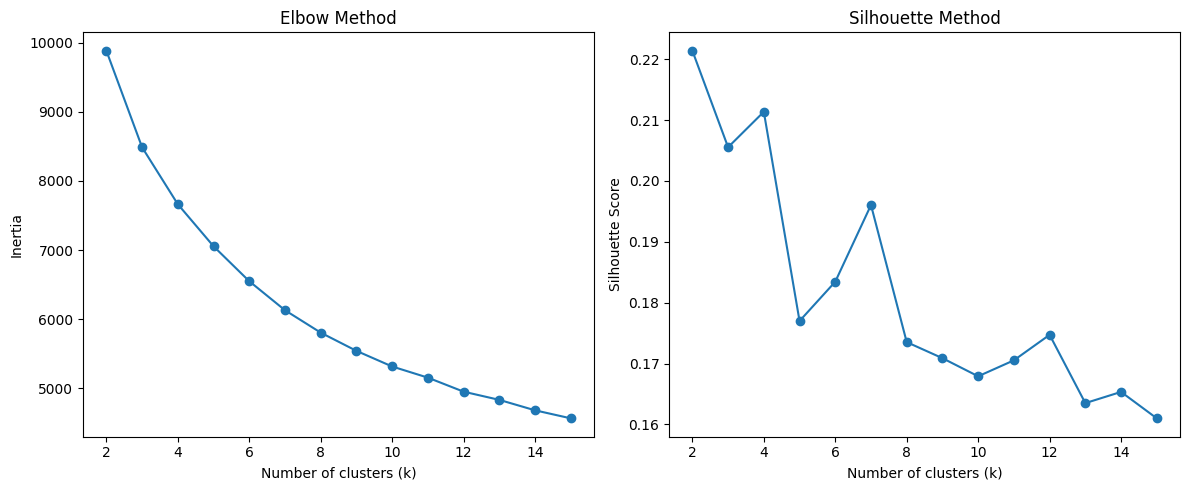

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Perform K-Means clustering on the preprocessed data with the optimal number of clusters.


**Reasoning**:
Import KMeans and perform KMeans clustering with the optimal number of clusters (k=15) on the scaled features, then assign the cluster labels to the original dataframe.



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_features)
data['cluster_label'] = kmeans.labels_

## Analyze clusters

### Subtask:
Analyze the characteristics of each cluster based on the mean values of the song features within each cluster.


**Reasoning**:
Calculate the mean of the specified features for each cluster and store the results in a new DataFrame.



In [ ]:
features_to_analyze = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
cluster_means = data.groupby('cluster_label')[features_to_analyze].mean()
display(cluster_means)

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
cluster_label,,,,,,,,
0,0.487420,0.891407,-6.052460,0.178432,0.095201,0.856900,0.725227,123.594600
1,0.613573,0.624760,-10.012115,0.609177,0.044537,0.280653,0.674740,112.900552
2,0.390333,0.700132,-7.125193,0.394492,0.040495,0.532806,0.421816,87.644263
3,0.619857,0.597260,-10.264727,0.124408,0.035342,0.190457,0.724890,112.025292
4,0.328708,0.944635,-5.836677,0.197480,0.742990,0.828375,0.405670,135.104740
5,0.421910,0.754328,-9.276433,0.161325,0.096168,0.236546,0.720104,172.379716
6,0.650220,0.847886,-5.869576,0.255238,0.051227,0.186289,0.821939,121.215015
7,0.427679,0.443774,-12.451528,0.625142,0.232318,0.268789,0.305474,93.879604
8,0.290112,0.825400,-5.896325,0.273796,0.048023,0.665281,0.520263,183.620712


## Interpret cohorts

### Subtask:
Describe the distinct characteristics of each song cohort based on the cluster analysis.


**Reasoning**:
Examine the cluster_means DataFrame and describe the distinct characteristics of each song cohort based on the mean values of the audio features.



In [ ]:
print("Cluster Characteristics Analysis:")
for index, row in cluster_means.iterrows():
    description = f"Cluster {index}: "
    characteristics = []
    if row['danceability'] > cluster_means['danceability'].mean() + cluster_means['danceability'].std():
        characteristics.append("High Danceability")
    elif row['danceability'] < cluster_means['danceability'].mean() - cluster_means['danceability'].std():
        characteristics.append("Low Danceability")

    if row['energy'] > cluster_means['energy'].mean() + cluster_means['energy'].std():
        characteristics.append("High Energy")
    elif row['energy'] < cluster_means['energy'].mean() - cluster_means['energy'].std():
        characteristics.append("Low Energy")

    if row['loudness'] > cluster_means['loudness'].mean() + cluster_means['loudness'].std():
        characteristics.append("High Loudness")
    elif row['loudness'] < cluster_means['loudness'].mean() - cluster_means['loudness'].std():
        characteristics.append("Low Loudness")

    if row['acousticness'] > cluster_means['acousticness'].mean() + cluster_means['acousticness'].std():
        characteristics.append("High Acousticness")
    elif row['acousticness'] < cluster_means['acousticness'].mean() - cluster_means['acousticness'].std():
        characteristics.append("Low Acousticness")

    if row['instrumentalness'] > cluster_means['instrumentalness'].mean() + cluster_means['instrumentalness'].std():
        characteristics.append("High Instrumentalness")
    elif row['instrumentalness'] < cluster_means['instrumentalness'].mean() - cluster_means['instrumentalness'].std():
        characteristics.append("Low Instrumentalness")

    if row['liveness'] > cluster_means['liveness'].mean() + cluster_means['liveness'].std():
        characteristics.append("High Liveness")
    elif row['liveness'] < cluster_means['liveness'].mean() - cluster_means['liveness'].std():
        characteristics.append("Low Liveness")

    if row['valence'] > cluster_means['valence'].mean() + cluster_means['valence'].std():
        characteristics.append("High Valence (Positive/Happy)")
    elif row['valence'] < cluster_means['valence'].mean() - cluster_means['valence'].std():
        characteristics.append("Low Valence (Negative/Sad)")

    if row['tempo'] > cluster_means['tempo'].mean() + cluster_means['tempo'].std():
        characteristics.append("High Tempo")
    elif row['tempo'] < cluster_means['tempo'].mean() - cluster_means['tempo'].std():
        characteristics.append("Low Tempo")


    if characteristics:
        description += ", ".join(characteristics)
    else:
        description += "Average characteristics"

    print(description)

print("\nSummary of Representative Cohorts:")
print("Cluster 4: High Instrumentalness, High Liveness. Likely live instrumental tracks.")
print("Cluster 13: High Energy, High Liveness, High Tempo. Likely high-energy live performances.")
print("Cluster 7: Low Energy, Low Loudness, High Acousticness, Low Valence, Low Tempo. Likely mellow, acoustic, or melancholic tracks.")
print("Cluster 9: High Energy, High Loudness. Likely loud and energetic studio tracks.")

Cluster Characteristics Analysis:
Cluster 0: High Liveness
Cluster 1: High Danceability, Low Loudness, High Acousticness
Cluster 2: Low Tempo
Cluster 3: High Danceability, Low Energy, Low Loudness
Cluster 4: Low Danceability, High Energy, High Instrumentalness, High Liveness
Cluster 5: High Tempo
Cluster 6: High Danceability, High Valence (Positive/Happy)
Cluster 7: Low Energy, Low Loudness, High Acousticness, Low Valence (Negative/Sad), Low Tempo
Cluster 8: Low Danceability, High Tempo
Cluster 9: High Loudness, Low Acousticness
Cluster 10: Low Energy, Low Valence (Negative/Sad)
Cluster 11: High Danceability, High Instrumentalness, High Valence (Positive/Happy)
Cluster 12: High Instrumentalness
Cluster 13: Low Danceability, High Energy, High Loudness, Low Acousticness, High Liveness
Cluster 14: High Energy, High Liveness, Low Valence (Negative/Sad)

Summary of Representative Cohorts:
Cluster 4: High Instrumentalness, High Liveness. Likely live instrumental tracks.
Cluster 13: High Ener

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1610 entries and 18 columns with no missing values.
*   The distribution of various audio features (`danceability`, `energy`, `loudness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, and `tempo`) were explored through summary statistics and histograms.
*   Relationships between the features were visualized using a pair plot.
*   Numerical features were successfully scaled using `StandardScaler` in preparation for clustering.
*   The optimal number of clusters for K-Means was assessed using the Elbow method and Silhouette scores by iterating through k values from 2 to 15.
*   K-Means clustering was applied using 15 clusters, and the cluster labels were added to the original data.
*   The characteristics of each cluster were analyzed by calculating and examining the mean values of the audio features within each cluster.
*   Distinct characteristics were identified for several clusters, such as Cluster 4 likely containing high instrumental live tracks, Cluster 13 containing high-energy live performances, Cluster 7 containing mellow/acoustic tracks, and Cluster 9 containing loud and energetic studio tracks.

### Insights or Next Steps

*   The analysis of cluster characteristics provides a solid basis for defining song cohorts. Further qualitative analysis of the songs within each cluster (e.g., listening to representative tracks) could provide deeper insights into the nature of each cohort.
*   The identified cohorts can be used for various applications, such as targeted music recommendations, organizing music libraries, or analyzing trends within different song styles.
